In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Data preprocessing

In [4]:
df = pd.read_csv('/kaggle/input/titanic/train.csv',index_col='PassengerId')
del df['Name']
df.head(3)


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.Survived.value_counts()
df.groupby(['Fare']).Survived.agg(['mean','count']).sort_values('count',ascending=False)

,mean,count
Fare,,
8.0500,0.116279,43
13.0000,0.380952,42
7.8958,0.026316,38
7.7500,0.352941,34
26.0000,0.483871,31
...,...,...
8.1125,1.000000,1
8.1375,0.000000,1
17.4000,1.000000,1


In [6]:
df.isna().sum()
#sns.heatmap(df.isnull(),yticklabels=False ,cbar=False)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


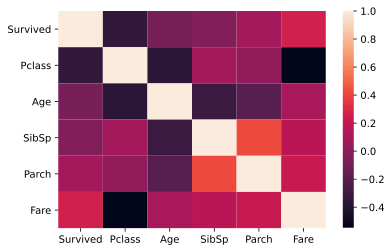

In [7]:
sns.heatmap(df.corr())
df.corr()[['Survived']].sort_values('Survived',ascending=False)

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64


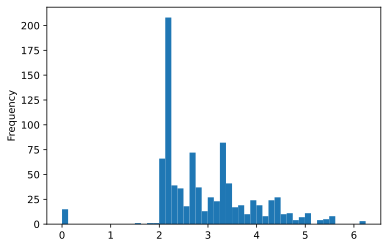

In [8]:
df.Fare.apply(np.log1p).plot.hist(bins=50)
print(df.Fare)

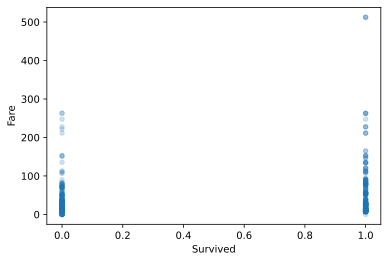

In [9]:
df.plot.scatter(x='Survived' , y='Fare', alpha= 0.2)

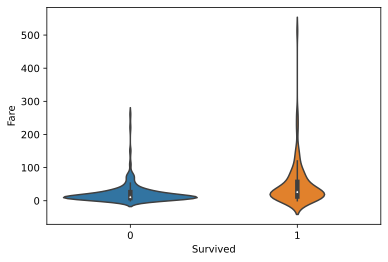

In [10]:
sns.violinplot(x='Survived',y='Fare',data = df)

## Extract the numerical features

In [11]:
features_df = df.drop('Survived', axis=1 )
num_features = features_df.select_dtypes(np.number)
num_features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


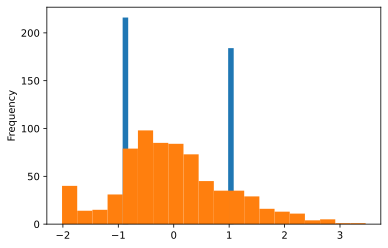

In [12]:
feature = num_features.Pclass
value =  feature[feature < feature.quantile(.95)]
value = (value - value.mean())/value.std()
value.plot.hist(bins= 20)
value_1 =  num_features.Age
value_1 = (value_1 - value_1.mean())/value_1.std()
value_1.plot.hist(bins=20)

 ## One hot encoding to extract the categorical values

In [14]:
cat_features = df.select_dtypes(['object'])
cat_features.sample(5)
pd.get_dummies(cat_features)

,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
features = pd.concat([num_features,pd.get_dummies(cat_features)],axis=1)
target = df['Survived']
features= features.fillna(0)

# Splitting our dataset

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(features, target, test_size =0.25)
x_train.sample(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
344,2,25.0,0,0,13.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
635,3,9.0,3,2,27.9000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
92,3,20.0,0,0,7.8542,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
700,3,42.0,0,0,7.6500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
381,1,42.0,0,0,227.5250,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Building the model

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

baseline =  DummyClassifier(strategy='most_frequent')
model = RandomForestClassifier()


In [18]:
baseline.fit(x_train,y_train)
model.fit(x_train,y_train)

RandomForestClassifier()

# Predictions

In [19]:
baseline_pred = baseline.predict(x_test)
model_pred =  model.predict(x_test)

# Comparing the performance of both models 

baseline :               precision    recall  f1-score   support

           0       0.61      1.00      0.76       136
           1       0.00      0.00      0.00        87

    accuracy                           0.61       223
   macro avg       0.30      0.50      0.38       223
weighted avg       0.37      0.61      0.46       223



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


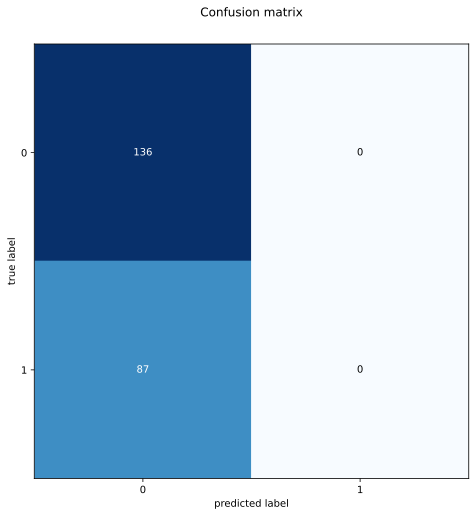

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

print('baseline :',classification_report(y_test,baseline.predict(x_test)))
dtCM = confusion_matrix(y_test, baseline_pred)

fig, ax = plot_confusion_matrix(conf_mat=dtCM ,  figsize=(8,8))
plt.title('Confusion matrix')
plt.show()



model :               precision    recall  f1-score   support

           0       0.82      0.95      0.88       136
           1       0.89      0.67      0.76        87

    accuracy                           0.84       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.85      0.84      0.83       223



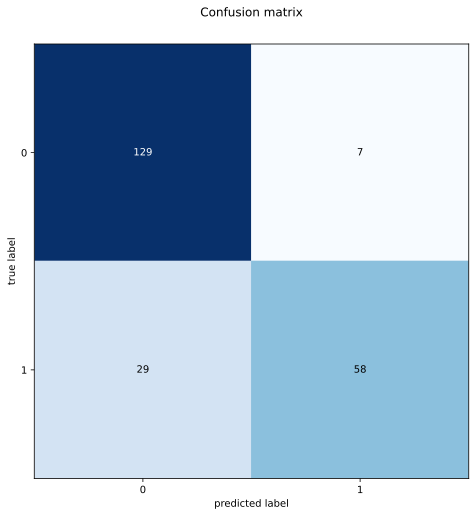

In [21]:
print('model :',classification_report(y_test,model.predict(x_test)))
dtCM = confusion_matrix(y_test, model_pred)

fig, ax = plot_confusion_matrix(conf_mat=dtCM ,  figsize=(8,8))
plt.title('Confusion matrix')
plt.show()
